In [1]:
import pandas as pd
db = pd.read_csv("bank.csv",sep=',')
db

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [2]:
db.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [3]:
for col in db:
    print(db[col].unique())

[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['married' 'single' 'divorced']
['secondary' 'tertiary' 'primary' 'unknown']
['no' 'yes']
[2343   45 1270 ... 1594 2593 -134]
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[1042 1467 1389 ... 1504  818 1812]
[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
[ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154

In [4]:
db["job"]=db["job"].map({"admin.": 1, "technician": 2,"services": 3, "management": 4,"retired": 5, "blue-collar": 6,"unemployed": 7, "entrepreneur": 8,"housemaid": 9, "unknown": 10,"self-employed": 11, "student": 12})   #convert admitted variable into numerical
db["marital"]=db["marital"].map({"married": 1, "single": 0,"divorced": 2})   #convert admitted variable into numerical
db["education"]=db["education"].map({"secondary": 1, "tertiary": 0,"primary": 2,"unknown": 3})   #convert admitted variable into numerical
db["default"]=db["default"].map({"yes": 1, "no": 0})   #convert admitted variable into numerical
db["housing"]=db["housing"].map({"yes": 1, "no": 2})   #convert admitted variable into numerical
db["loan"]=db["loan"].map({"yes": 1, "no": 2})   #convert admitted variable into numerical
db["contact"]=db["contact"].map({"unknown": 1, "cellular": 0,"telephone": 2})   #convert admitted variable into numerical
db["month"]=db["month"].map({"jan": 1, "feb": 2,"mar": 3, "apr": 4,"may": 5, "jun": 6,"jul": 7, "aug": 8,"sep": 9, "oct": 10,"nov": 11, "dec": 12})   #convert admitted variable into numerical
db["poutcome"]=db["poutcome"].map({"unknown": 1, "other": 0,"failure": 2,"success": 3})   #convert admitted variable into numerical
db["deposit"]=db["deposit"].map({"yes": 1, "no": 0})   #convert admitted variable into numerical
db

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,1,1,1,0,2343,1,2,1,5,5,1042,1,-1,0,1,1
1,56,1,1,1,0,45,2,2,1,5,5,1467,1,-1,0,1,1
2,41,2,1,1,0,1270,1,2,1,5,5,1389,1,-1,0,1,1
3,55,3,1,1,0,2476,1,2,1,5,5,579,1,-1,0,1,1
4,54,1,1,0,0,184,2,2,1,5,5,673,2,-1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,6,0,2,0,1,1,2,0,20,4,257,1,-1,0,1,0
11158,39,3,1,1,0,733,2,2,1,16,6,83,4,-1,0,1,0
11159,32,2,0,1,0,29,2,2,0,19,8,156,2,-1,0,1,0
11160,43,2,1,1,0,0,2,1,0,8,5,9,2,172,5,2,0


In [5]:
for col in db:
    print(db[col].unique())

[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[1 0 2]
[1 0 2 3]
[0 1]
[2343   45 1270 ... 1594 2593 -134]
[1 2]
[2 1]
[1 0 2]
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
[ 5  6  7  8 10 11 12  1  2  3  4  9]
[1042 1467 1389 ... 1504  818 1812]
[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
[ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  90
 196 246 238 203 268 189 267  92   9  88  85 210 257 261 270 106 199 112
  41 294 231 239 302 135 307 222 138 323 141 320 264 316 315 256 146 328
  74 148 327 341 145 266 234 345 318 325 274 343 260 305 344 254 180 340
  8

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [7]:
db.dtypes


age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [8]:
x=db[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]]  #we have more than one input
y=db["deposit"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) #splitting data with test size of 35%
x_model, x_valid, y_model, y_valid = train_test_split(x_train, y_train, test_size = 0.2)


In [9]:
x_train.shape


(10045, 16)

In [10]:
y_train.shape


(10045,)

In [11]:
x_test.shape


(1117, 16)

In [12]:
y_test.shape


(1117,)

In [13]:
# Build the model.
model = Sequential(    
    [
     Dense(256, activation='relu', input_dim =16),
     Dense(256, activation='relu'),
     Dense(128, activation='relu'),
     Dense(1, activation='sigmoid')
    ]
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 103,169
Trainable params: 103,169
Non-trainable params: 0
_________________________________________________________________


In [14]:
batch_size = 30
epochs = 70
# Compile K model.
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [15]:
history = model.fit(x_model, y_model, validation_data=(x_valid, y_valid), epochs= epochs) #training

Epoch 1/70
252/252 [==============================] - 2s 4ms/step - loss: 6.3626 - accuracy: 0.6350 - val_loss: 0.9397 - val_accuracy: 0.6959
Epoch 2/70
252/252 [==============================] - 1s 3ms/step - loss: 1.4141 - accuracy: 0.6878 - val_loss: 1.2087 - val_accuracy: 0.6799
Epoch 3/70
252/252 [==============================] - 1s 3ms/step - loss: 1.1145 - accuracy: 0.6966 - val_loss: 0.7782 - val_accuracy: 0.6969
Epoch 4/70
252/252 [==============================] - 1s 3ms/step - loss: 0.6416 - accuracy: 0.7278 - val_loss: 0.8436 - val_accuracy: 0.6476
Epoch 5/70
252/252 [==============================] - 1s 3ms/step - loss: 0.6554 - accuracy: 0.7229 - val_loss: 0.6400 - val_accuracy: 0.7133
Epoch 6/70
252/252 [==============================] - 1s 3ms/step - loss: 0.6028 - accuracy: 0.7288 - val_loss: 0.6977 - val_accuracy: 0.7237
Epoch 7/70
252/252 [==============================] - 1s 3ms/step - loss: 0.6398 - accuracy: 0.7247 - val_loss: 0.6151 - val_accuracy: 0.7133
Epoch 

252/252 [==============================] - 1s 3ms/step - loss: 0.4576 - accuracy: 0.7871 - val_loss: 0.5035 - val_accuracy: 0.7755
Epoch 59/70
252/252 [==============================] - 1s 3ms/step - loss: 0.4645 - accuracy: 0.7903 - val_loss: 0.4988 - val_accuracy: 0.7636
Epoch 60/70
252/252 [==============================] - 1s 3ms/step - loss: 0.4628 - accuracy: 0.7902 - val_loss: 0.4809 - val_accuracy: 0.7725
Epoch 61/70
252/252 [==============================] - 1s 3ms/step - loss: 0.4577 - accuracy: 0.7914 - val_loss: 0.5112 - val_accuracy: 0.7765
Epoch 62/70
252/252 [==============================] - 1s 3ms/step - loss: 0.4753 - accuracy: 0.7750 - val_loss: 0.5064 - val_accuracy: 0.7725
Epoch 63/70
252/252 [==============================] - 1s 3ms/step - loss: 0.4516 - accuracy: 0.7891 - val_loss: 0.4767 - val_accuracy: 0.7750
Epoch 64/70
252/252 [==============================] - 1s 3ms/step - loss: 0.4593 - accuracy: 0.7847 - val_loss: 0.4970 - val_accuracy: 0.7760
Epoch 65/70

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 103,169
Trainable params: 103,169
Non-trainable params: 0
_________________________________________________________________


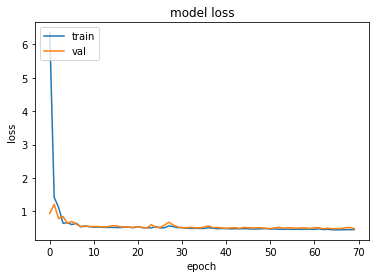

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

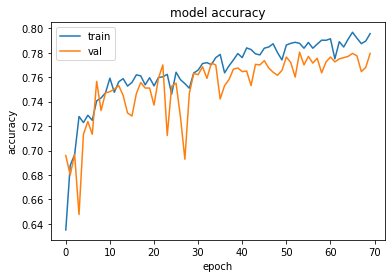

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()